### Objective

##### Analysis of data for online retail company ShopEase. The company wants to improve sales performance and customer satisfaction.


### Data Source

##### The data used in this project was sourced from Victoria Solutions Consulting Group

In [658]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and clean data (data pre-processing)

In [659]:
# Load dataset
sales_data_df = pd.read_excel("sales_data.xlsx")
sales_data_df.head()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,NaN,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North


In [660]:
# Check number of columns and rows and data type
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  20 non-null     int64  
 1   Date            20 non-null     object 
 2   Customer_ID     20 non-null     object 
 3   Product         20 non-null     object 
 4   Category        20 non-null     object 
 5   Quantity        20 non-null     int64  
 6   Price           20 non-null     int64  
 7   Total_Amount    19 non-null     float64
 8   Payment_Method  20 non-null     object 
 9   Region          20 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB


In [661]:
# Standardise date and format transaction ID to object
sales_data_df["Date"] = pd.to_datetime(sales_data_df["Date"], errors="coerce")

sales_data_df["Transaction_ID"] = sales_data_df["Transaction_ID"].astype("object")

In [662]:
# Remove the letter prefix in Customer_ID column and convert column to integer
sales_data_df["Customer_ID"] = (
    sales_data_df["Customer_ID"].str.replace("C", "", case=False).astype(int)
)
sales_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  20 non-null     object        
 1   Date            20 non-null     datetime64[ns]
 2   Customer_ID     20 non-null     int64         
 3   Product         20 non-null     object        
 4   Category        20 non-null     object        
 5   Quantity        20 non-null     int64         
 6   Price           20 non-null     int64         
 7   Total_Amount    19 non-null     float64       
 8   Payment_Method  20 non-null     object        
 9   Region          20 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 1.7+ KB


In [663]:
# Remove any duplicate entries
sales_data_df.drop_duplicates()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,1,Laptop,Electronics,1,800,NaN,Credit Card,North
1,1002,2024-01-10,2,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,3,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,4,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,5,Book,Books,3,20,60.0,Credit Card,North
5,1006,2024-02-10,1,Laptop,Electronics,1,800,800.0,Credit Card,North
6,1007,2024-03-15,6,Shoes,Clothing,2,50,100.0,Cash,South
7,1008,2024-03-18,7,T-Shirt,Clothing,1,25,25.0,PayPal,West
8,1009,2024-03-20,8,Smartwatch,Electronics,1,200,200.0,Debit Card,East
9,1010,2024-04-01,9,Book,Books,2,20,40.0,Credit Card,North


In [664]:
# Identify missing values
sales_data_df.isnull().sum()

Transaction_ID    0
Date              0
Customer_ID       0
Product           0
Category          0
Quantity          0
Price             0
Total_Amount      1
Payment_Method    0
Region            0
dtype: int64

In [665]:
# Get descriptive statistics
sales_data_df.describe()

,Date,Customer_ID,Quantity,Price,Total_Amount
count,20,20.000000,20.000000,20.000000,19.000000
mean,2024-03-30 06:00:00,8.700000,1.550000,325.500000,375.263158
min,2024-01-05 00:00:00,1.000000,1.000000,20.000000,25.000000
25%,2024-02-09 12:00:00,3.750000,1.000000,43.750000,77.500000
50%,2024-04-03 00:00:00,8.500000,1.000000,200.000000,200.000000
75%,2024-05-08 12:00:00,13.250000,2.000000,600.000000,550.000000
max,2024-06-10 00:00:00,18.000000,4.000000,800.000000,1200.000000
std,NaN,5.620451,0.887041,302.484884,389.067524


In [666]:
# Fill missing values with mean value of the column
sales_data_df = sales_data_df.fillna(sales_data_df.mean(numeric_only=True))

# Remove "Total_Amount" column from current position and
# insert on index 10
columns = sales_data_df.columns.tolist()
columns.remove("Total_Amount")
columns.insert(10, "Total_Amount")

# Reorder the DataFrame
sales_data_df = sales_data_df[columns]

# Print
sales_data_df.head()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Payment_Method,Region,Total_Amount
0,1001,2024-01-05,1,Laptop,Electronics,1,800,Credit Card,North,375.263158
1,1002,2024-01-10,2,Smartphone,Electronics,2,600,Cash,South,1200.000000
2,1003,2024-01-12,3,Headphones,Electronics,1,100,PayPal,West,100.000000
3,1004,2024-02-05,4,Tablet,Electronics,1,500,Debit Card,East,500.000000
4,1005,2024-02-08,5,Book,Books,3,20,Credit Card,North,60.000000


### Data exploration
#### Select features and explore patterns in sales, seasonality and product

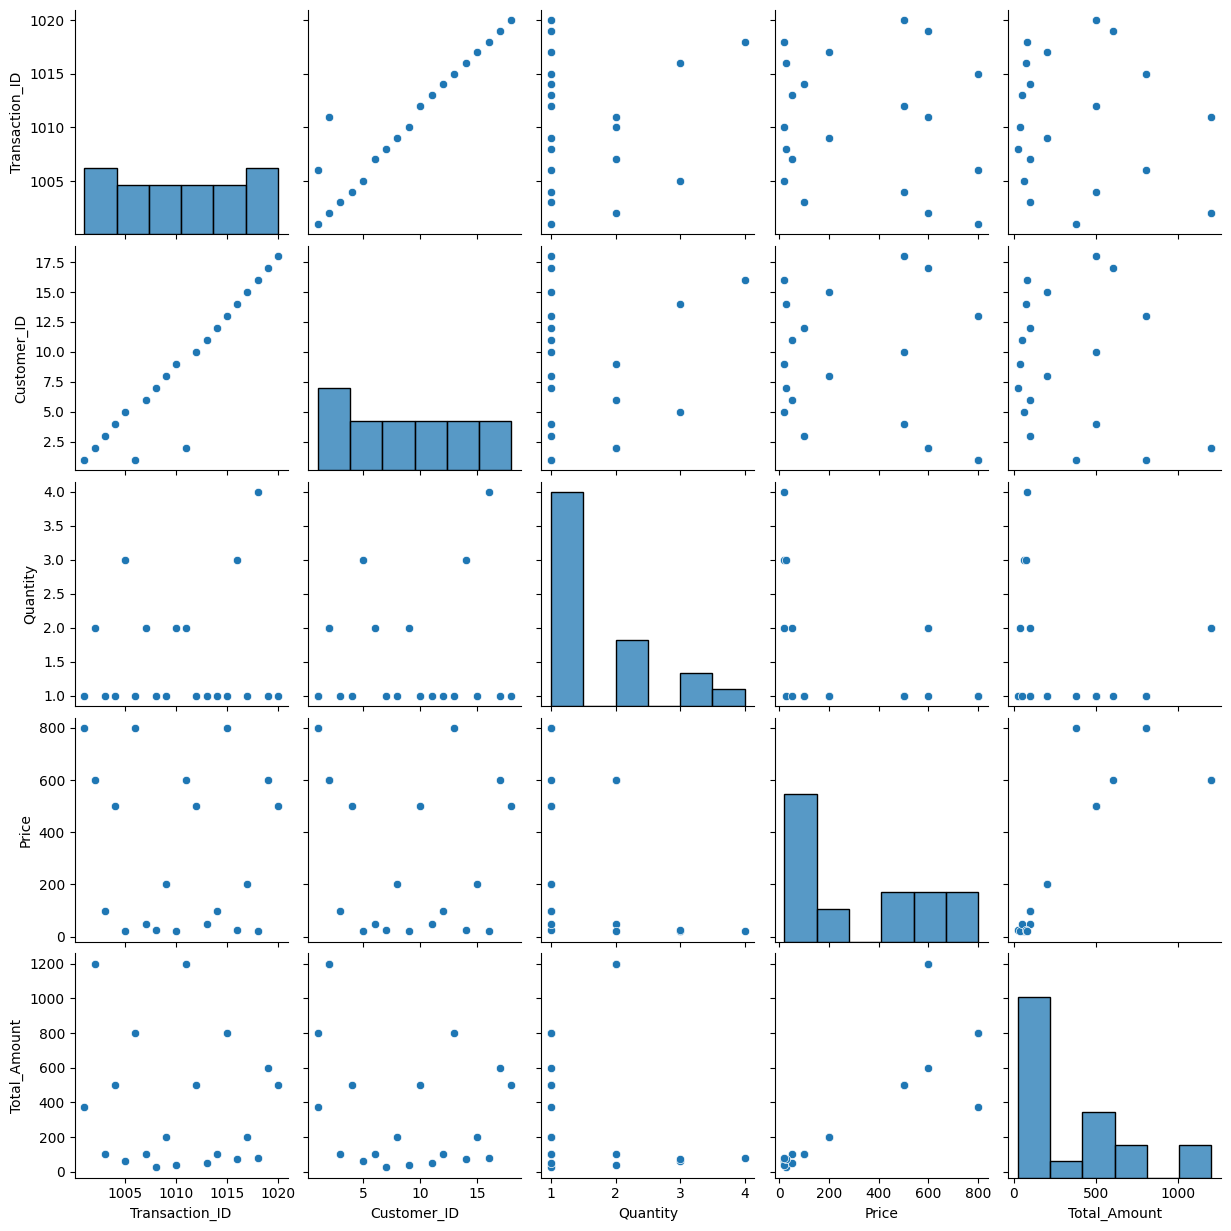

In [667]:
sns.pairplot(data=sales_data_df)

- A quick scan of the data using pairplots indicates no significant pattern or trends. To compare categorical vs numerical data, we will use bar charts.
- We will then create a line plot to analyse the sales data over the 6 months and 
- We could create a correlation matrix for numerical features but we only have one numerical column which is the total amount. Quantity and Price are inputs for the total amount and comparison will therefore not be useful.

In [668]:
# Define x and y variables
x = sales_data_df.iloc[:, 0:8]
y = sales_data_df.iloc[:, 9]

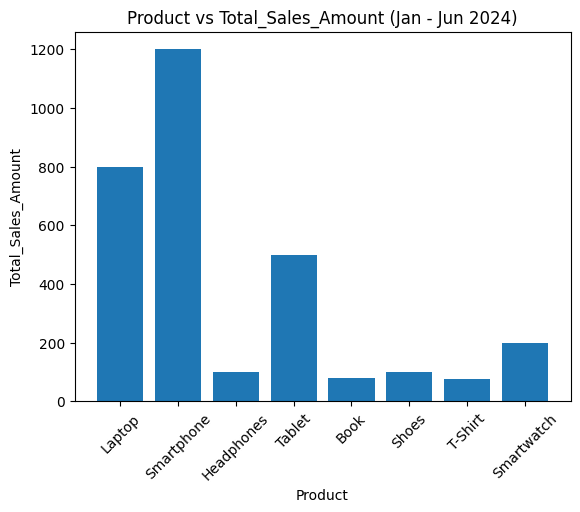

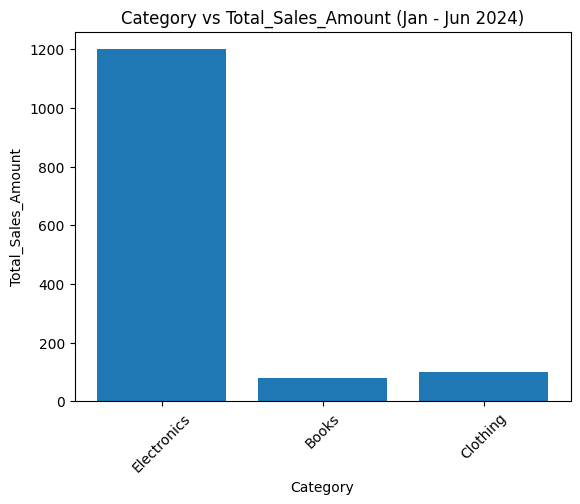

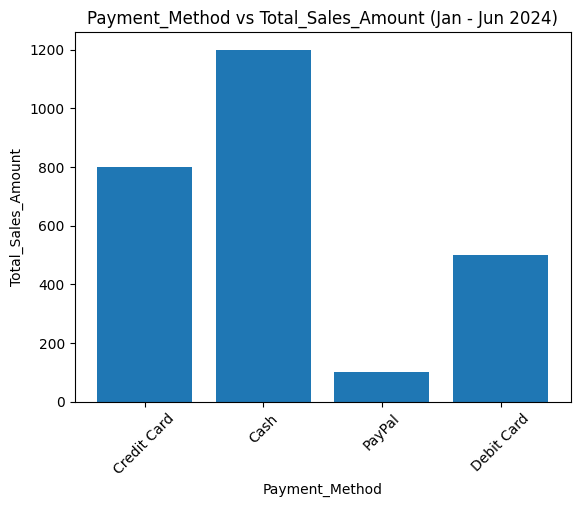

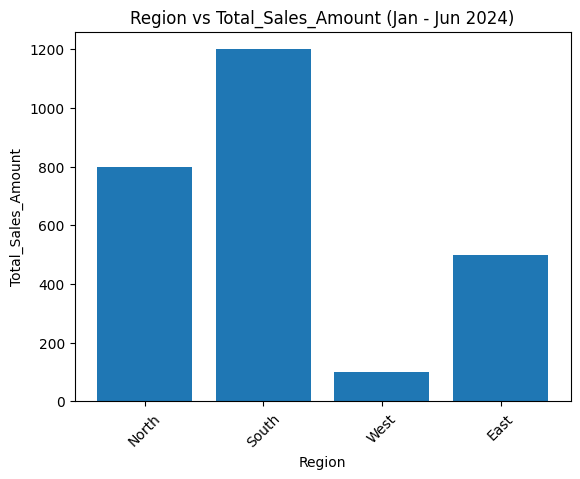

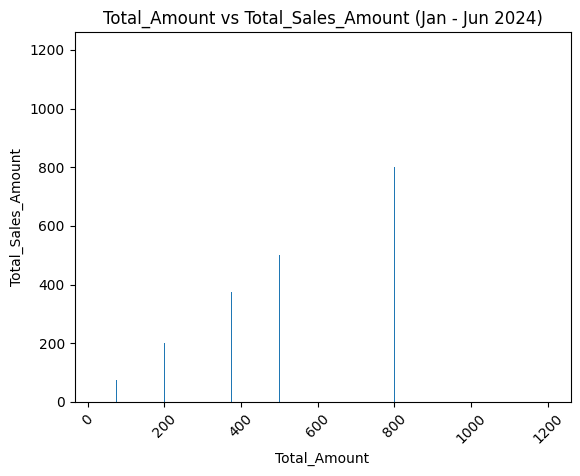

In [669]:
# Bar charts indicating sales patterns across products, categories, payment methods and regions
cleaned_sales_data = sales_data_df.drop(
    ["Transaction_ID", "Date", "Customer_ID", "Quantity", "Price"], axis=1
)

for i in cleaned_sales_data:
    plt.bar(cleaned_sales_data[i], cleaned_sales_data["Total_Amount"])
    plt.xlabel(i)
    plt.ylabel("Total_Sales_Amount")
    plt.title(f"{i} vs Total_Sales_Amount (Jan - Jun 2024)")
    plt.xticks(rotation=45)
    plt.show()

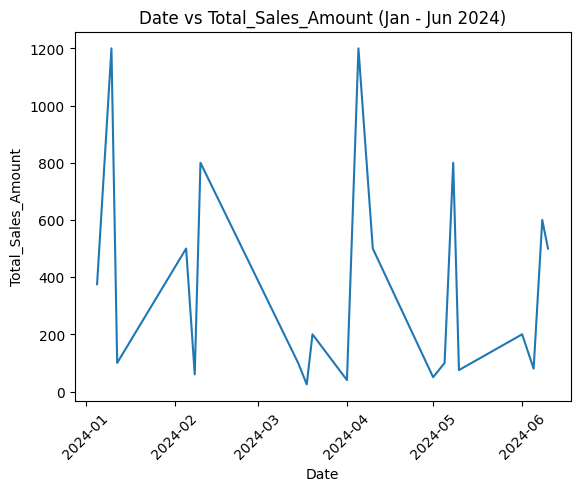

In [670]:
# Line graph showing sales performance across months
plt.plot(sales_data_df["Date"], sales_data_df["Total_Amount"])
plt.xlabel("Date")
plt.ylabel("Total_Sales_Amount")
plt.title(f"{"Date"} vs Total_Sales_Amount (Jan - Jun 2024)")
plt.xticks(rotation=45)
plt.show()

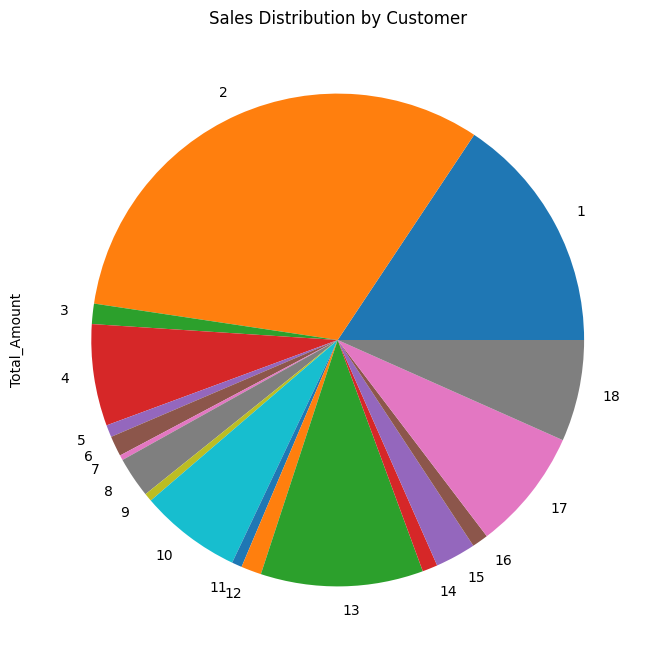

In [671]:
# Plot pie chart indicating sales performance by customer
# Group sales by customer
sales_by_customer = sales_data_df.groupby("Customer_ID")["Total_Amount"].sum()

plt.figure(figsize=(8, 8))
sales_by_customer.plot.pie()
plt.title("Sales Distribution by Customer")
plt.show()

#### Key observations for the period Jan - Jun 2024
- Smartphones are the best selling product followed by laptops and tablets
- The best selling sales category is electonics
- Customers prefer to use cash followed by credit
- Most sales products are sold in the South and North regions. The west has really low sales
- We have peak sales in January and April
- Customer 1 and 2 and repeat customers

#### Recommendations
- Focus marketing efforts in the West and East regions to increase customer base as they have the lowest sales
- Increase stock and introduce bulk discounts around January and April as these are peak seasons. Probably because students and professionals need new electronics around the time
- Reduce seasonal dips by introducing products that have steady or complementary demand when electronics slow down
- Increase targeted marketing to existing customers to increase repeat sales
- Create targeted surveys to existing customers to get feedback on product and service satisfaction